In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("bank-full.csv",sep = ";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.shape

(45211, 17)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

<AxesSubplot:xlabel='marital', ylabel='count'>

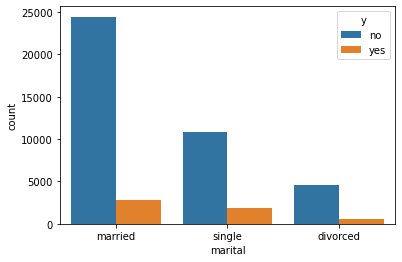

In [7]:
sns.countplot(data = df, x = "marital",hue = "y")

In [8]:
df["marital"].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [9]:
def replace_marital(x):
    if x == "single":
        return 0
    elif x == "married":
        return 1
    else:
        return 2

df["marital"] = df["marital"].apply(replace_marital)

In [10]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,1,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,0,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,1,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,1,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,1,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,0,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,2,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,1,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,0,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [11]:
df["education"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

<AxesSubplot:xlabel='education', ylabel='count'>

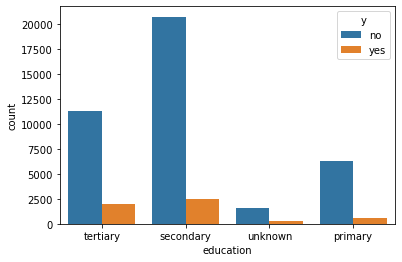

In [12]:
sns.countplot(data = df, x = "education",hue = "y")

In [13]:
df["education"] = df["education"].map({
    "primary":0,
    "secondary":1,
    "tertiary":2,
    "unknown":np.NaN
})

In [14]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,1,2.0,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,0,1.0,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,1,1.0,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,1,NaN,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,NaN,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [15]:
df["housing"].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

<AxesSubplot:xlabel='housing', ylabel='count'>

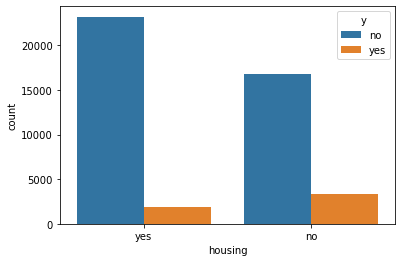

In [16]:
sns.countplot(data = df, x = "housing",hue = "y")

In [17]:
df["housing"] = df["housing"].replace({
    "yes":0,
    "no":1
})

In [18]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,1,2.0,no,2143,0,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,0,1.0,no,29,0,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,1,1.0,no,2,0,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,1,NaN,no,1506,0,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,NaN,no,1,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [19]:
df["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [20]:
df["job"] = df["job"].replace({
    "management":0,
    "technician":1,
    "entrepreneur":2,
    "blue-collar":3,
    "retired":4,
    "admin.":5,
    "services":6,
    "self-employed":7,
    "unemployed":8,
    "housemaid":9,
    "student":10,
    "unknown":np.NaN    
})

In [21]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0.0,1,2.0,no,2143,0,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,1.0,0,1.0,no,29,0,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,2.0,1,1.0,no,2,0,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,3.0,1,NaN,no,1506,0,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,NaN,0,NaN,no,1,1,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,0.0,1,2.0,no,231,0,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,0.0,0,2.0,no,447,0,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,2.0,2,2.0,yes,2,0,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,4.0,1,0.0,no,121,0,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,1.0,0,1.0,no,593,0,no,unknown,5,may,55,1,-1,0,unknown,no


In [22]:
df["default"].value_counts()

no     44396
yes      815
Name: default, dtype: int64

<AxesSubplot:xlabel='default', ylabel='count'>

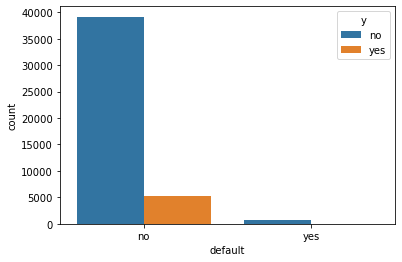

In [23]:
sns.countplot(data = df, x = "default", hue = "y")

In [24]:
df[df["default"]=="yes"]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7,42,2.0,2,2.0,yes,2,0,no,unknown,5,may,380,1,-1,0,unknown,no
79,55,6.0,2,1.0,yes,1,0,no,unknown,5,may,208,1,-1,0,unknown,no
338,51,5.0,0,1.0,yes,-2,1,no,unknown,5,may,402,3,-1,0,unknown,no
419,33,1.0,1,1.0,yes,72,0,no,unknown,6,may,623,1,-1,0,unknown,no
458,33,3.0,0,1.0,yes,-60,1,no,unknown,6,may,243,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41562,71,4.0,2,2.0,yes,1236,0,no,cellular,14,sep,335,4,-1,0,unknown,yes
44099,28,0.0,0,2.0,yes,1414,0,no,cellular,8,jul,294,1,521,1,failure,yes
44161,25,1.0,0,2.0,yes,160,1,yes,unknown,13,jul,151,1,-1,0,unknown,no
44302,31,6.0,0,1.0,yes,-248,1,no,unknown,27,jul,5,1,-1,0,unknown,no


In [25]:
df.groupby(["default"]).size()

default
no     44396
yes      815
dtype: int64

In [26]:
df.groupby(["default"])["y"].value_counts()

default  y  
no       no     39159
         yes     5237
yes      no       763
         yes       52
Name: y, dtype: int64

In [27]:
df["default"] = df["default"].replace({
    "no":0,
    "yes":1
})

In [28]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0.0,1,2.0,0,2143,0,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,1.0,0,1.0,0,29,0,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,2.0,1,1.0,0,2,0,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,3.0,1,NaN,0,1506,0,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,NaN,0,NaN,0,1,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [29]:
df["contact"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

<AxesSubplot:xlabel='contact', ylabel='count'>

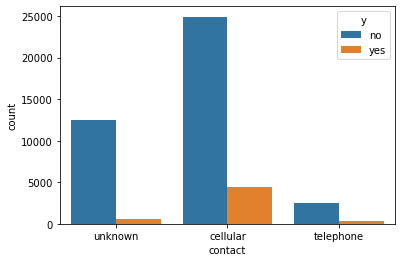

In [30]:
sns.countplot(data = df, x = "contact", hue = "y")

In [31]:
df["contact"] = df["contact"].replace({
    "cellular":0,
    "telephone":1,
    "unknown":np.NaN
})

In [32]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0.0,1,2.0,0,2143,0,no,NaN,5,may,261,1,-1,0,unknown,no
1,44,1.0,0,1.0,0,29,0,no,NaN,5,may,151,1,-1,0,unknown,no
2,33,2.0,1,1.0,0,2,0,yes,NaN,5,may,76,1,-1,0,unknown,no
3,47,3.0,1,NaN,0,1506,0,no,NaN,5,may,92,1,-1,0,unknown,no
4,33,NaN,0,NaN,0,1,1,no,NaN,5,may,198,1,-1,0,unknown,no


In [33]:
df[df["contact"]==0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
12657,27,0.0,0,1.0,0,35,1,no,0.0,4,jul,255,1,-1,0,unknown,no
12658,54,3.0,1,0.0,0,466,1,no,0.0,4,jul,297,1,-1,0,unknown,no
12659,43,3.0,1,1.0,0,105,1,yes,0.0,4,jul,668,2,-1,0,unknown,no
12661,27,1.0,0,1.0,0,126,0,yes,0.0,4,jul,436,4,-1,0,unknown,no
12662,28,3.0,0,1.0,0,-127,0,no,0.0,4,jul,1044,3,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,1.0,0,1.0,0,505,1,yes,0.0,17,nov,386,2,-1,0,unknown,yes
45206,51,1.0,1,2.0,0,825,1,no,0.0,17,nov,977,3,-1,0,unknown,yes
45207,71,4.0,2,0.0,0,1729,1,no,0.0,17,nov,456,2,-1,0,unknown,yes
45208,72,4.0,1,1.0,0,5715,1,no,0.0,17,nov,1127,5,184,3,success,yes


In [34]:
df.describe()

,age,job,marital,education,default,balance,housing,contact,day,duration,campaign,pdays,previous
count,45211.000000,44923.000000,45211.000000,43354.000000,45211.000000,45211.000000,45211.000000,32191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,3.152483,0.832275,1.148775,0.018027,1362.272058,0.444162,0.090274,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,2.688623,0.608230,0.665358,0.133049,3044.765829,0.496878,0.286578,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,1.000000,0.000000,1.000000,0.000000,72.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,3.000000,1.000000,1.000000,0.000000,448.000000,0.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,5.000000,1.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,10.000000,2.000000,2.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [35]:
df["balance"].min()

-8019

In [36]:
df["balance"].max()

102127

In [37]:
df["balance"] = df["balance"].apply(lambda x : (x-df["balance"].min())/(df["balance"].max()-df["balance"].min()))

In [38]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0.0,1,2.0,0,0.092259,0,no,NaN,5,may,261,1,-1,0,unknown,no
1,44,1.0,0,1.0,0,0.073067,0,no,NaN,5,may,151,1,-1,0,unknown,no
2,33,2.0,1,1.0,0,0.072822,0,yes,NaN,5,may,76,1,-1,0,unknown,no
3,47,3.0,1,NaN,0,0.086476,0,no,NaN,5,may,92,1,-1,0,unknown,no
4,33,NaN,0,NaN,0,0.072812,1,no,NaN,5,may,198,1,-1,0,unknown,no


In [39]:
df["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [40]:
df["month"].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

<AxesSubplot:xlabel='month', ylabel='count'>

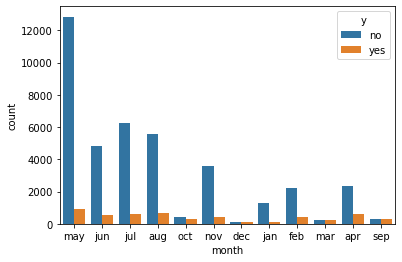

In [41]:
sns.countplot(data = df, x = "month", hue = "y")

In [42]:
df["month"] = df["month"].map({
    "jan":1,
    "feb":2,
    "mar":3,
    "apr":4,
    "may":5,
    "jun":6,
    "jul":7,
    "aug":8,
    "sep":9,
    "oct":10,
    "nov":11,
    "dec":12
})

In [43]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0.0,1,2.0,0,0.092259,0,no,NaN,5,5,261,1,-1,0,unknown,no
1,44,1.0,0,1.0,0,0.073067,0,no,NaN,5,5,151,1,-1,0,unknown,no
2,33,2.0,1,1.0,0,0.072822,0,yes,NaN,5,5,76,1,-1,0,unknown,no
3,47,3.0,1,NaN,0,0.086476,0,no,NaN,5,5,92,1,-1,0,unknown,no
4,33,NaN,0,NaN,0,0.072812,1,no,NaN,5,5,198,1,-1,0,unknown,no


In [44]:
df["poutcome"].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [45]:
df["poutcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

<AxesSubplot:xlabel='poutcome', ylabel='count'>

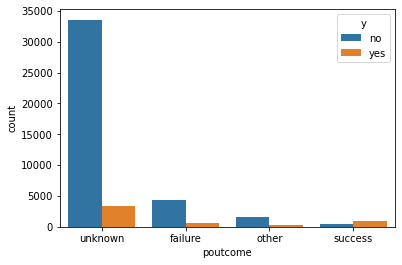

In [46]:
sns.countplot(data = df, x = "poutcome", hue = "y")

In [47]:
df["poutcome"] = df["poutcome"].replace({
   "failure":0,
    "success":1,
    "other":2,
    "unknown": np.NaN
})

In [48]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0.0,1,2.0,0,0.092259,0,no,NaN,5,5,261,1,-1,0,NaN,no
1,44,1.0,0,1.0,0,0.073067,0,no,NaN,5,5,151,1,-1,0,NaN,no
2,33,2.0,1,1.0,0,0.072822,0,yes,NaN,5,5,76,1,-1,0,NaN,no
3,47,3.0,1,NaN,0,0.086476,0,no,NaN,5,5,92,1,-1,0,NaN,no
4,33,NaN,0,NaN,0,0.072812,1,no,NaN,5,5,198,1,-1,0,NaN,no


In [49]:
df["pdays"].unique()

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

In [50]:
df["pdays"].max()

871

In [51]:
df["pdays"].min()

-1

In [52]:
df["pdays"] = df["pdays"].apply(lambda x: (x-df["pdays"].min())/(df["pdays"].max()-df["pdays"].min()))

In [53]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0.0,1,2.0,0,0.092259,0,no,NaN,5,5,261,1,0.0,0,NaN,no
1,44,1.0,0,1.0,0,0.073067,0,no,NaN,5,5,151,1,0.0,0,NaN,no
2,33,2.0,1,1.0,0,0.072822,0,yes,NaN,5,5,76,1,0.0,0,NaN,no
3,47,3.0,1,NaN,0,0.086476,0,no,NaN,5,5,92,1,0.0,0,NaN,no
4,33,NaN,0,NaN,0,0.072812,1,no,NaN,5,5,198,1,0.0,0,NaN,no
5,35,0.0,1,2.0,0,0.074901,0,no,NaN,5,5,139,1,0.0,0,NaN,no
6,28,0.0,0,2.0,0,0.076862,0,yes,NaN,5,5,217,1,0.0,0,NaN,no
7,42,2.0,2,2.0,1,0.072822,0,no,NaN,5,5,380,1,0.0,0,NaN,no
8,58,4.0,1,0.0,0,0.073902,0,no,NaN,5,5,50,1,0.0,0,NaN,no
9,43,1.0,0,1.0,0,0.078187,0,no,NaN,5,5,55,1,0.0,0,NaN,no


In [54]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,1.0,1,2.0,0,0.080293,1,no,0.0,17,11,977,3,0.000000,0,NaN,yes
45207,71,4.0,2,0.0,0,0.088501,1,no,0.0,17,11,456,2,0.000000,0,NaN,yes
45208,72,4.0,1,1.0,0,0.124689,1,no,0.0,17,11,1127,5,0.212156,3,1.0,yes
45209,57,3.0,1,1.0,0,0.078868,1,no,1.0,17,11,508,4,0.000000,0,NaN,no
45210,37,2.0,1,1.0,0,0.099777,1,no,0.0,17,11,361,2,0.216743,11,2.0,no


In [55]:
df["y"] = df["y"].map({
    "yes":1,
    "no":0
})

In [56]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0.0,1,2.0,0,0.092259,0,no,NaN,5,5,261,1,0.0,0,NaN,0
1,44,1.0,0,1.0,0,0.073067,0,no,NaN,5,5,151,1,0.0,0,NaN,0
2,33,2.0,1,1.0,0,0.072822,0,yes,NaN,5,5,76,1,0.0,0,NaN,0
3,47,3.0,1,NaN,0,0.086476,0,no,NaN,5,5,92,1,0.0,0,NaN,0
4,33,NaN,0,NaN,0,0.072812,1,no,NaN,5,5,198,1,0.0,0,NaN,0


In [57]:
df["duration"].unique()

array([ 261,  151,   76, ..., 1298, 1246, 1556], dtype=int64)

In [58]:
df["duration"].max()

4918

In [59]:
df["duration"].min()

0

In [60]:
df["duration"] = df["duration"].apply(lambda x: (x-df["duration"].min())/(df["duration"].max()-df["duration"].min()))

In [61]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0.0,1,2.0,0,0.092259,0,no,NaN,5,5,0.053070,1,0.0,0,NaN,0
1,44,1.0,0,1.0,0,0.073067,0,no,NaN,5,5,0.030704,1,0.0,0,NaN,0
2,33,2.0,1,1.0,0,0.072822,0,yes,NaN,5,5,0.015453,1,0.0,0,NaN,0
3,47,3.0,1,NaN,0,0.086476,0,no,NaN,5,5,0.018707,1,0.0,0,NaN,0
4,33,NaN,0,NaN,0,0.072812,1,no,NaN,5,5,0.040260,1,0.0,0,NaN,0


In [62]:
df.corr()

,age,job,marital,education,default,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.013356,0.403240,-0.166899,-0.017879,0.097783,0.185513,0.192750,-0.009120,0.092903,-0.004648,0.004760,-0.023758,0.001288,-0.017853,0.025155
job,-0.013356,1.000000,-0.023372,-0.339922,-0.006023,-0.033140,0.031715,0.069042,-0.028223,-0.069002,0.008279,-0.034093,0.007664,-0.007873,0.021859,0.017330
marital,0.403240,-0.023372,1.000000,-0.122053,0.007023,-0.002122,-0.016096,0.031276,0.005261,0.050938,-0.011852,0.008994,-0.019172,-0.014973,-0.035123,-0.045588
education,-0.166899,-0.339922,-0.122053,1.000000,-0.011842,0.069306,0.079123,-0.112050,0.026564,0.072787,0.002656,0.004092,0.004031,0.025067,0.014176,0.070928
default,-0.017879,-0.006023,0.007023,-0.011842,1.000000,-0.066745,0.006025,-0.017514,0.009424,0.014989,-0.010021,0.016822,-0.029979,-0.018329,-0.003296,-0.022419
balance,0.097783,-0.033140,-0.002122,0.069306,-0.066745,1.000000,0.068768,0.036435,0.004503,0.094605,0.021560,-0.014578,0.003435,0.016674,0.015365,0.052838
housing,0.185513,0.031715,-0.016096,0.079123,0.006025,0.068768,1.000000,0.055054,0.027982,0.173887,-0.005075,0.023599,-0.124178,-0.037076,0.110537,0.139173
contact,0.192750,0.069042,0.031276,-0.112050,-0.017514,0.036435,0.055054,1.000000,0.021754,0.007552,-0.030813,0.068352,-0.026902,0.002481,0.039391,-0.012098
day,-0.009120,-0.028223,0.005261,0.026564,0.009424,0.004503,0.027982,0.021754,1.000000,0.101989,-0.030206,0.162490,-0.093044,-0.051710,0.017383,-0.028348
month,0.092903,-0.069002,0.050938,0.072787,0.014989,0.094605,0.173887,0.007552,0.101989,1.000000,-0.011866,0.054868,-0.108940,-0.035600,-0.019505,0.018717


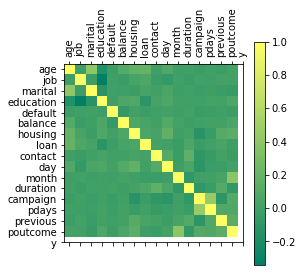

In [63]:
plt.matshow(df.corr(),cmap = "summer")
plt.colorbar()

plt.xticks(list(range(len(df.columns))),df.columns,rotation = "vertical")
plt.yticks(list(range(len(df.columns))),df.columns,rotation = "horizontal")

plt.show()

In [64]:
range(len(df.columns))

range(0, 17)

In [65]:
list(range(len(df.columns)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [66]:
df.corr()["y"].sort_values(ascending = False)

y            1.000000
duration     0.394521
housing      0.139173
poutcome     0.137843
pdays        0.103621
previous     0.093236
education    0.070928
balance      0.052838
age          0.025155
month        0.018717
job          0.017330
contact     -0.012098
default     -0.022419
day         -0.028348
marital     -0.045588
campaign    -0.073172
Name: y, dtype: float64

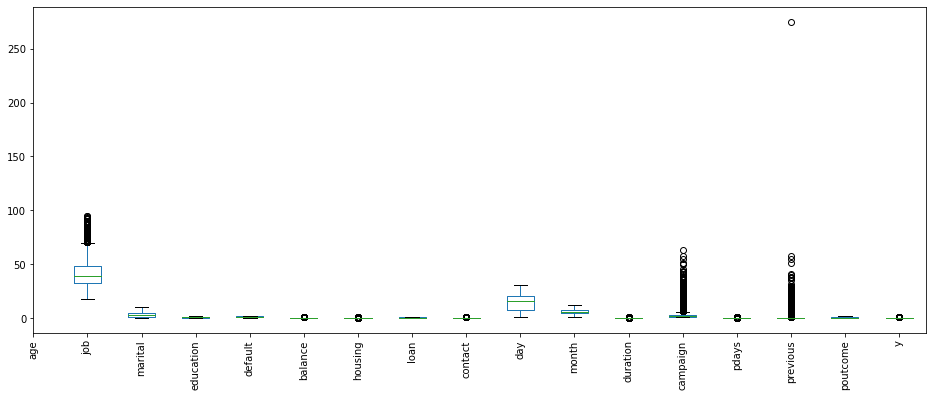

In [67]:
df.plot.box(figsize=(16,6))
plt.xticks(list(range(len(df.columns))),df.columns,rotation = "vertical")
plt.show()

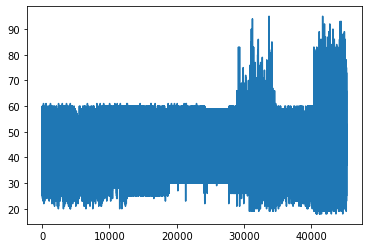

In [68]:
plt.plot(df["age"].values)

In [69]:
df["age"]

0        58
1        44
2        33
3        47
4        33
         ..
45206    51
45207    71
45208    72
45209    57
45210    37
Name: age, Length: 45211, dtype: int64

In [70]:
df["age"].values

array([58, 44, 33, ..., 72, 57, 37], dtype=int64)

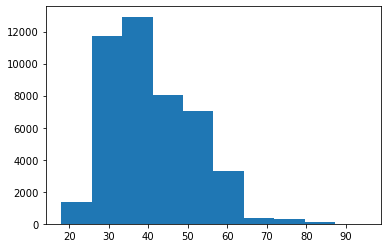

In [71]:
plt.hist(df["age"].values)
plt.show()

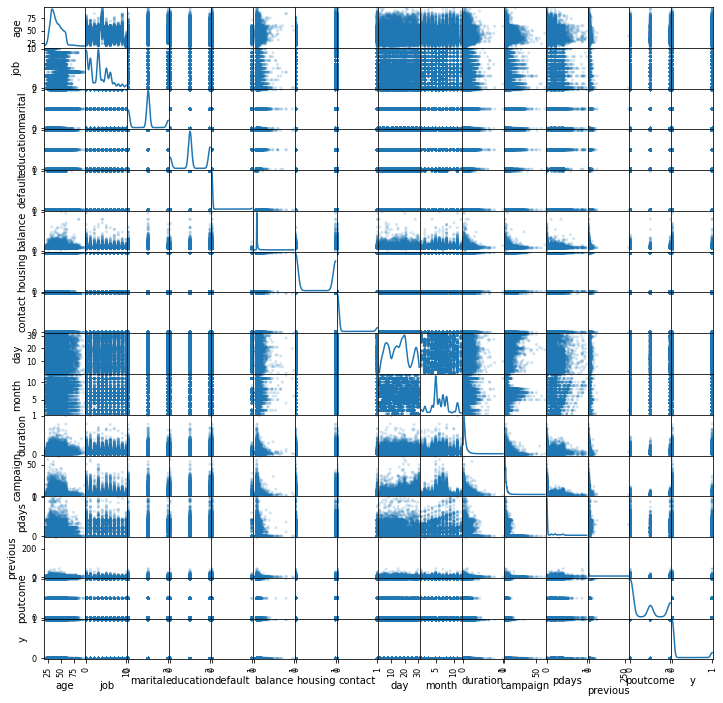

In [72]:
pd.plotting.scatter_matrix(df,alpha = 0.2, figsize = (12,12),diagonal = "kde")
plt.show()

<AxesSubplot:>

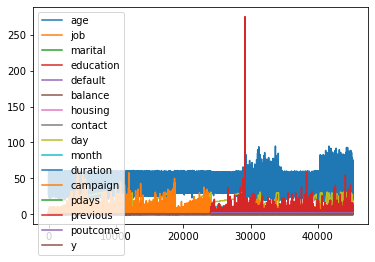

In [73]:
df.plot()

In [74]:
def remove_outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1 
    lb  = q1-1.5*iqr
    ub = q3+1.5*iqr
    df_out = df.loc[(df[col] > lb) & (df[col] < ub)]
    return df_out

In [75]:
df1=remove_outlier(df,"age")

In [76]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0.0,1,2.0,0,0.092259,0,no,NaN,5,5,0.053070,1,0.0,0,NaN,0
1,44,1.0,0,1.0,0,0.073067,0,no,NaN,5,5,0.030704,1,0.0,0,NaN,0
2,33,2.0,1,1.0,0,0.072822,0,yes,NaN,5,5,0.015453,1,0.0,0,NaN,0
3,47,3.0,1,NaN,0,0.086476,0,no,NaN,5,5,0.018707,1,0.0,0,NaN,0
4,33,NaN,0,NaN,0,0.072812,1,no,NaN,5,5,0.040260,1,0.0,0,NaN,0


In [77]:
df1.shape

(44724, 17)

In [78]:
df1["age"].max()

70

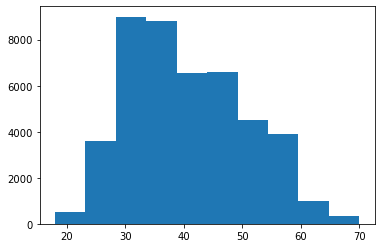

In [79]:
plt.hist(df1["age"].values)
plt.show()

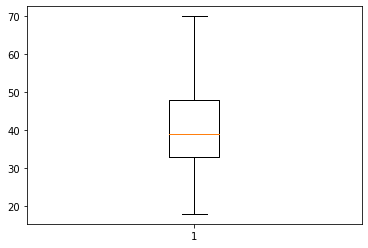

In [80]:
plt.boxplot(df1["age"])
plt.show()

In [81]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0.0,1,2.0,0,0.092259,0,no,NaN,5,5,0.053070,1,0.0,0,NaN,0
1,44,1.0,0,1.0,0,0.073067,0,no,NaN,5,5,0.030704,1,0.0,0,NaN,0
2,33,2.0,1,1.0,0,0.072822,0,yes,NaN,5,5,0.015453,1,0.0,0,NaN,0
3,47,3.0,1,NaN,0,0.086476,0,no,NaN,5,5,0.018707,1,0.0,0,NaN,0
4,33,NaN,0,NaN,0,0.072812,1,no,NaN,5,5,0.040260,1,0.0,0,NaN,0


In [89]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44724 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        44724 non-null  int64  
 1   job        44443 non-null  float64
 2   marital    44724 non-null  int64  
 3   education  42918 non-null  float64
 4   default    44724 non-null  int64  
 5   balance    44724 non-null  float64
 6   housing    44724 non-null  int64  
 7   loan       44724 non-null  object 
 8   contact    31704 non-null  float64
 9   day        44724 non-null  int64  
 10  month      44724 non-null  int64  
 11  duration   44724 non-null  float64
 12  campaign   44724 non-null  int64  
 13  pdays      44724 non-null  float64
 14  previous   44724 non-null  int64  
 15  poutcome   8071 non-null   float64
 16  y          44724 non-null  int64  
dtypes: float64(7), int64(9), object(1)
memory usage: 7.1+ MB


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

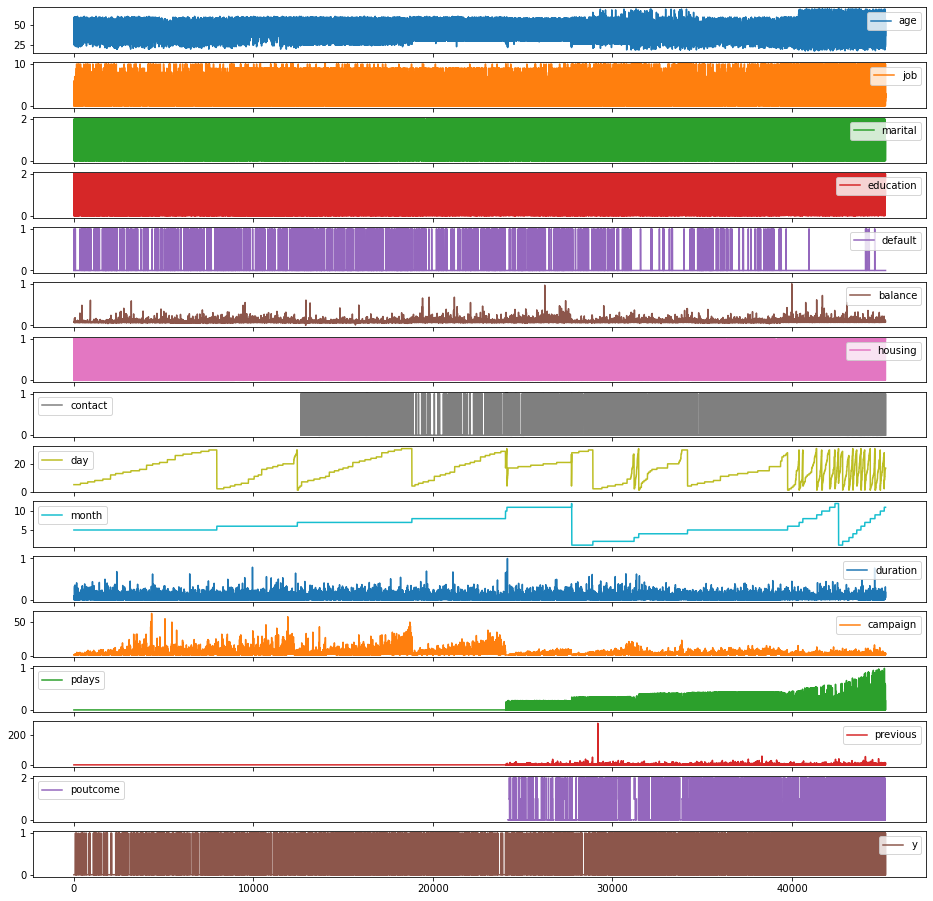

In [83]:
df1.plot(subplots = True,figsize = (16,16))

(array([3.9232e+04, 5.1130e+03, 2.8900e+02, 5.4000e+01, 2.0000e+01,
        7.0000e+00, 6.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

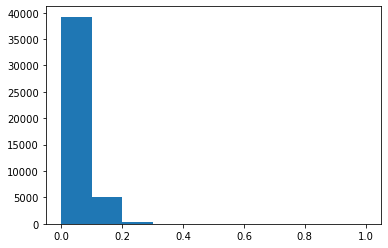

In [92]:
plt.hist(df1["balance"])

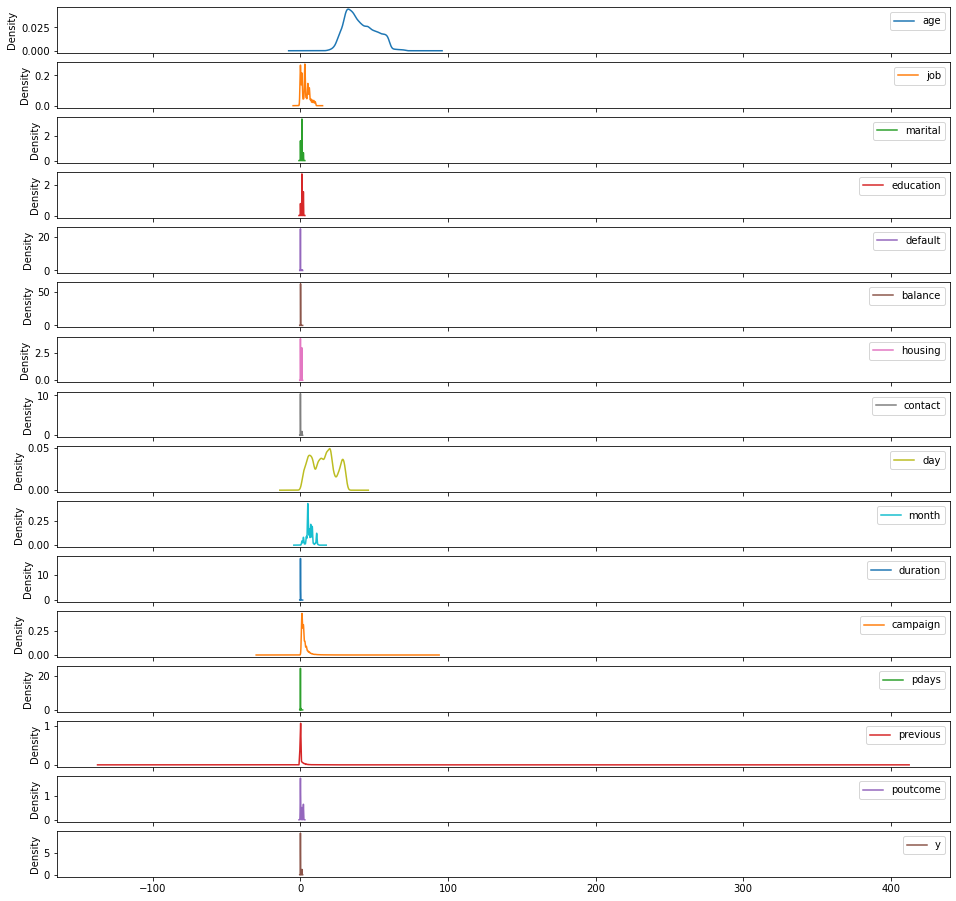

In [93]:
df1.plot.kde(subplots = True,figsize = (16,16))
plt.show()

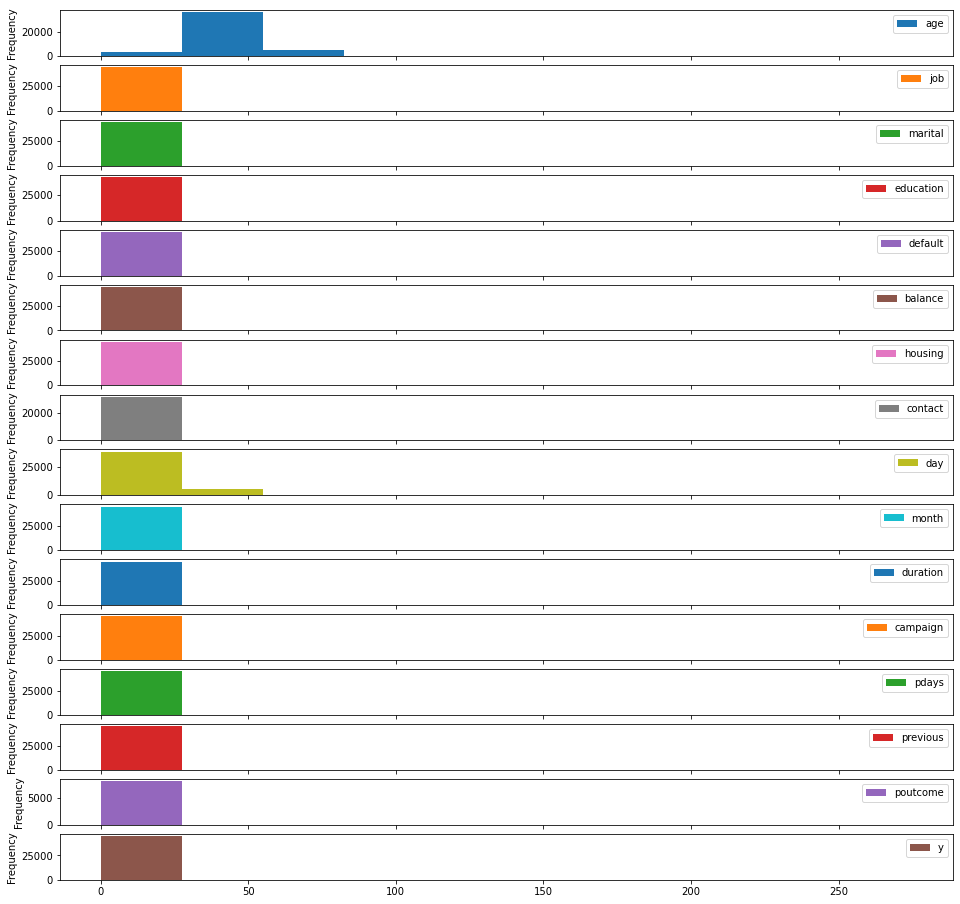

In [94]:
df1.plot.hist(subplots = True,figsize = (16,16))
plt.show()